# Réalisation d'une analyse statistique avec le langage R
Dans un premier temps, nous allons récupérer les données dans le CSV

In [2]:
# Charger les données
source("charger.R")
mondata <- charger(2105482)

In [ ]:
# Afficher les données
mondata

# Histogramme des ventes

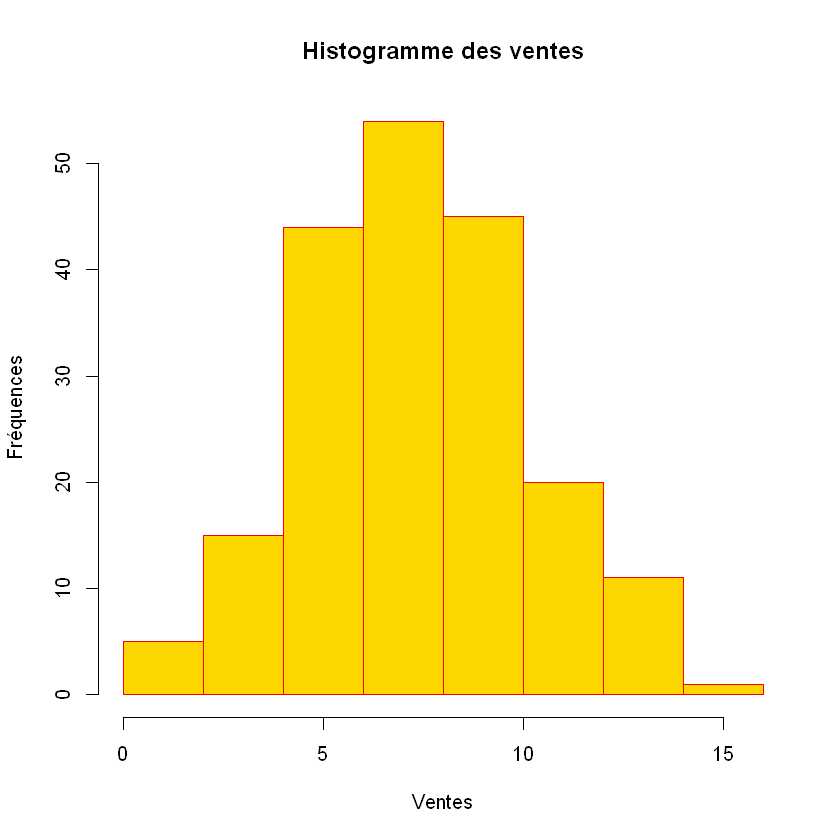

In [16]:
hist(mondata$Sales, col="gold",border="red", main=paste("Histogramme des ventes"),
     xlab="Ventes",ylab="Fréquences")

# Diagramme de Tukey pour les ventes

In [ ]:
boxplot(mondata$Sales,
horizontal=TRUE,
col="gold",border="red",
xlab="Nombre de vente")

# Droite de Henry

In [64]:
henryplot(mondata$Sales, x = "x", fill = "blue", alpha = 0.5, scale = 1)

ERROR: Error in henryplot(mondata$Sales, x = "x", fill = "blue", alpha = 0.5, : impossible de trouver la fonction "henryplot"


# Test de normalité (Shapiro-Wilk)

In [63]:
shapiro.test(mondata$Sales)


	Shapiro-Wilk normality test

data:  mondata$Sales
W = 0.99463, p-value = 0.7128


# Interprétation du test de normalité (Shapiro-Wilk)


# Tableau de statistique descriptive

In [62]:
mesureStatistique = data.frame(mondata=c("Sales"), 
                     moyenne=NA, écartType=NA, q1=NA, mediane=NA,
                     q3=NA, IntervalConfiance=NA)
# moyenne,
mesureStatistique$moyenne = sapply(2, function(i) mean(mondata$Sales)) 
# quartiles q1, q2 = mediane, q3 
mesureStatistique[1, c("q1", "mediane", "q3")] = quantile(mondata$Sales, probs = c(0.25,0.5,0.75))
# écart type,
mesureStatistique$écartType = sapply(2, function(i) sd(mondata$Sales)) 
# intervalle de confiance pour la moyenne
ci <- t.test(mondata$Sales, conf.level = 0.95)$conf.int
# cat("95% Confidence Interval: [", ci[1], ", ", ci[2], "]\n")
mesureStatistique$IntervalConfiance = sprintf("[%f, %f]", ci[1], ci[2])

# Afficher le resultat
mesureStatistique

mondata,moyenne,écartType,q1,mediane,q3,IntervalConfiance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Sales,7.301692,2.826037,5.14,7.37,8.88,"[6.902551, 7.700833]"
